In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

import csv

In [2]:
# read the data from DataTrain.csv
data = pd.read_csv("DataTrain.csv")

# get label column
label = data["Category"]

# get the rest of the columns
X = data.drop("Category", axis=1)
X = X.drop("Id", axis=1)

X.shape

(100, 14)

In [3]:
# specify the visible GPU
gpus = tf.config.experimental.list_physical_devices('GPU')

tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
tf.random.set_seed(0)
np.random.seed(0)

In [5]:
# divide the data set
X_train, X_test, y_train, y_test = train_test_split(X, label, test_size=0.001, random_state=42) #调到0.5 test的acc就会变小 0.94
y_train = tf.keras.utils.to_categorical(y_train, num_classes=5)

# build the model of MLP for classification
model = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(5, activation='softmax')
])

In [6]:
model.compile(optimizer=Adam(lr = 0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [7]:
# train the model
with tf.device('/GPU:0'):
    history = model.fit( X_train,
                            y_train,
                               epochs=500,
                               #initial_epoch = 200,
                               batch_size=8
                               )
# Visualize the images rebuilt by the model !

Epoch 1/500
13/13 [==============================] - 1s 2ms/step - loss: 760.5162 - accuracy: 0.2184
Epoch 2/500
13/13 [==============================] - 0s 2ms/step - loss: 359.8672 - accuracy: 0.3462
Epoch 3/500
13/13 [==============================] - 0s 1ms/step - loss: 226.2657 - accuracy: 0.4014
Epoch 4/500
13/13 [==============================] - 0s 1ms/step - loss: 129.5951 - accuracy: 0.3349
Epoch 5/500
13/13 [==============================] - 0s 2ms/step - loss: 96.9039 - accuracy: 0.4221
Epoch 6/500
13/13 [==============================] - 0s 2ms/step - loss: 39.9209 - accuracy: 0.5696
Epoch 7/500
13/13 [==============================] - 0s 2ms/step - loss: 22.6042 - accuracy: 0.6664
Epoch 8/500
13/13 [==============================] - 0s 2ms/step - loss: 8.3642 - accuracy: 0.7511
Epoch 9/500
13/13 [==============================] - 0s 2ms/step - loss: 13.7269 - accuracy: 0.7479
Epoch 10/500
13/13 [==============================] - 0s 2ms/step - loss: 6.1161 - accuracy: 0.82

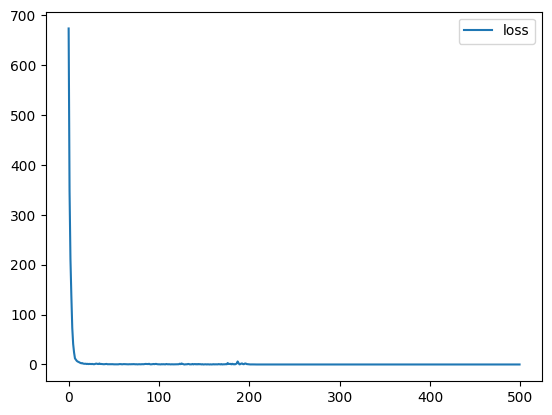

In [8]:
plt.plot(history.epoch, history.history.get('loss'),label='loss')
plt.legend()

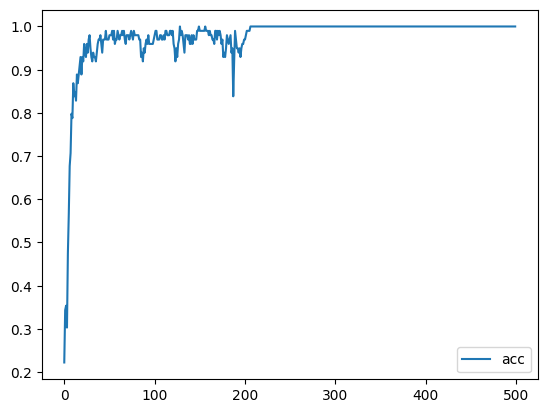

In [9]:
plt.plot(history.epoch, history.history.get('accuracy'),label='acc')

plt.legend()

In [10]:
import pandas as pd

# read features of the test set from test(inputmask).csv
data = pd.read_csv("Test(inputmask).csv")

X_test = data.drop("Id", axis=1)

X_test.shape

(50, 14)

In [11]:
# predict the probability of the class of the patient in the test set 
pred_labels = model.predict(X_test)
print("Predicted Labels: ", pred_labels)

Predicted Labels:  [[0.0000000e+00 2.6763562e-05 9.9997318e-01 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 4.2671333e-09 2.5838579e-15]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00]
 [0.0000000e+00 1.0000000e+00 5.3987688e-18 1.4875657e-14 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 7.1160989e-24 0.0000000e+00 2.2956712e-28 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00]
 [1.5157322e-20 0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00]
 [8.5860601e-04 1.1822004e-21 6.

In [12]:
#select the max value of the probability for each patient as their predicted label
predicted_class_index = np.argmax(pred_labels, axis=1)
predicted_class_index

array([2, 4, 0, 3, 4, 1, 0, 0, 4, 4, 3, 3, 4, 4, 0, 4, 2, 3, 1, 0, 4, 0,
       3, 3, 1, 2, 1, 4, 2, 4, 1, 4, 3, 2, 0, 3, 1, 3, 1, 0, 1, 1, 1, 2,
       4, 4, 0, 1, 1, 1], dtype=int64)

In [15]:
# write the prediction results to prediction.csv
new_col = [[x] for x in predicted_class_index] 

with open('prediction.csv', 'r') as infile:
    reader = csv.reader(infile)
    rows = list(reader)


for j in range(len(rows)-1):
    rows[j+1].insert(2, new_col[j][0])


#column_name = name[i]
rows[0].insert(2, 'category')


with open('prediction.csv', 'w', newline='') as outfile:
    writer = csv.writer(outfile)
    writer.writerows(rows)

In [ ]:
% 数据生成
x1 = [2011,2012,2013,2014,2015,2016,2017,2018,2019,2020];   % x1：x1 = -3:0.3:2;
y  = [8022.99, 8119.81, 8192.44, 8281.09 ,8315.11, 8381.47 ,8423.5, 8446.19, 8469.09, 8477.26];    % y： y = sin(x1)+0.2*x2.*x2;

inputData  = [x1];                       % 将x1,x2作为输入数据
outputData = y;                             % 将y作为输出数据
setdemorandstream(88888);                   % 指定随机种子，这样每次训练出来的网络都一样

%使用用输入输出数据(inputData、outputData)建立网络
%隐节点个数设为3.其中隐层、输出层的传递函数分别为tansig和purelin，使用trainlm方法训练
net = newff(inputData,outputData,3,{'tansig','purelin'},'trainlm');

%设置一些常用参数,然后训练网络
net.trainparam.goal = 0.0001;               % 训练目标：均方误差低于0.0001
net.trainparam.show = 10000;                  % 每训练400次展示一次结果
net.trainparam.epochs = 20000;              % 最大训练次数：15000.
[net,tr] = train(net,inputData,outputData); % 调用matlab神经网络工具箱自带的train函数训练网络

% 查看网络的预测结果
simout = sim(net,inputData);                % 调用matlab神经网络工具箱自带的sim函数得到网络的预测值
figure;                                     % 新建画图窗口窗口
t=1:length(simout);
plot(t,y,t,simout,'r') 